In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

plt.style.use("fivethirtyeight")

colors = ["Teal","Indigo","HotPink","DarkGoldenRod","Coral"]

Data is prepared as it has been provided by Bülent Esen's notebook https://www.kaggle.com/bulentesen/cardiac-arrythmia-naive-bayes-v2 who is the publisher of the dataset. No further data preparation besides the ones in cell 8 were not pursued since the data preparataion should be at it's best under the owner's own usage.

In [2]:
print(os.listdir('/'))

['$RECYCLE.BIN', 'apache-jmeter-5.5', 'Files', 'kali-linux-2022.3-installer-amd64.iso', 'Student-Management-System-in-Python-main', 'System Volume Information', 'Users', 'Windows10 x64(19045.2075).ISO', 'XuJiantao', '福昕高级PDF编辑器免安装已激活', '虚拟机VMware 15.5.0']


Data is a .CSV file which contains all the possible instructions that can be obtained from ECG readings. However some of the columns have unreliable data (nulls and just vectors of singular values to be exact). So the owner of the dataset seems to drop these columns not applying any interpolation implementation. So, this notebook doesn't follow any interpolation measure either.

In [3]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')

In [4]:
columns_to_replace = ['T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)']
for col in columns_to_replace:
    df[col].replace('?', -1, inplace=True)

In [5]:
df.head()

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [6]:
df.drop(["S\'_wave(ms)","CB","CD","CS","EV","EY","FF","FH","FJ","FL","FS","FZ","GA","S'_wave(mv)","IB","KP","LC",
         "AB", "AC", "AD","AE", "AF", "AG","AH","AI","AJ","AK","AL", "AM","AN", "AO", "AP", "AR", "AS", "AT","AU", "AV",  "AY",  "AZ", "BA", "BB","BC", "BD", "BE", "BF","BG", "BH","BI", "BJ", "BK", "BL", "BM", "BN",   "BP", "BR", "BS", "BT", "BU","BV","BY","BZ", "CA", "CC", "CE", "CF", "CG", "CH", "CI", "CJ","CK","CL","CM","CN","CO","CP","CR",   "CT","CU","CV","CY","CZ","DA","DB","DC","DD","DE","DF","DG","DH","DI","DJ","DK","DL","DM","DN","DO","DP","DR","DS","DT","DU","DV","DY","DZ","EA","EB","EC","ED","EF","EG","EH","EI","EJ","EK", "EL","EM","EM","EN","EO","EP", "ER","ES", "ET", "EU",

         "EZ", "FA","FB","FC","FD", "FE",    "FG",    "FI",    "FK",    "FM","FN","FO","FP", "FR",    "FT", "FU", "FV", "FY",     "GB",   "GM","GN","GO","GP",   "GR","GS","GT","GU","GV",    "GY","GZ","HA","HB","HC","HD", "HE","HF","HG","HH","HI","HJ","HK","HL","HM","HN","HO","HP","HR","HS","HT","HU","HV","HY","HZ","IA","IC","ID","IE","IF","IG","IH","II","IJ","IK","IL", "IM","IN","IO","IP","IR","IS","IT","IU","IV", "IY","IZ", "JA","JB","JC","JD","JE","JF","JG","JH","JI","JJ", "JK", "JL","JM","JN","JO","JP","JR","JS","JT","JU","JV","JY","JZ", "KA","KB","KC","KD","KE","KF","KG","KH","KI","KJ","KK","KL","KM","KN", "KO", "KR","KS","KT","KU","KV","KY","KZ", "LA","LB", "LC","LD","LE","LF","LG"
         ], axis=1, inplace=True)#axis=1指定删除的是列而不是行，inplace=True指定对原始DataFrame进行更改，而不是返回一个修改后的副本。

In [7]:
df.head()

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,JJ_wave(mv),Q_wave(mv),R_wave(mv),S_wave(mv),R'_wave(mv),P_wave(mv),T_wave(mv),QRSA(mvs),QRSTA(mvs),diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.2,0.0,6.1,-1.0,0.0,0.6,2.1,13.6,30.8,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.6,0.0,7.2,0.0,0.0,0.4,1.5,17.2,26.5,6
2,54,0,172,95,138,163,386,185,102,96,...,1.0,0.0,4.5,-2.8,0.0,0.3,2.5,-2.2,19.8,10
3,55,0,175,94,100,202,380,179,143,28,...,0.9,0.0,7.8,-0.7,0.0,1.1,1.9,27.3,45.1,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,0.0,5.2,-1.4,0.0,0.9,2.3,9.6,31.6,7


Further investigating the data have revealed there are some odd entries for the entries that are made presumably for babies which is handled manually. https://www.kaggle.com/mtavares51/binary-classification-on-arrhythmia-dataset

In [8]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

In [9]:
df.loc[df["height"] == 608, "height"] = 61
df.loc[df["height"] == 780, "height"] = 78
df['height'].value_counts().sort_index()

61      1
78      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
Name: height, dtype: int64

In [10]:
# However only first one is a normal kind of arrythmia where the other classes can be superclassed as risky arrythmia cases. In this notebook, all cases are classified as either normal or risky. Risky being the positive (True) case and normal being the negative (False) case, diagnosis column is reworked as follows.
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()

True     245
False    207
Name: label, dtype: int64

X is formed by importing every data at first. All the dimensionality reduction will be applied afterwards. Y is the label column.

In [11]:
X = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]
print(X.shape)
print(y.shape)

(452, 30)
(452,)


A train test split have been implemented with 0.2 test_size value.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 30)
(361,)
(91, 30)
(91,)


For every column, a MinMaxScaler have been implemented

In [13]:
# MinMaxScaler是特征归一化，放在同一个比较层次上
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [14]:
print(X_train[:10])#打印前10行

[[0.46987952 0.         0.86046512 0.57894737 0.4173913  0.28053435
  0.44765343 0.1978022  0.3902439  0.6        0.5184136  0.69444444
  0.51428571 0.49859944 0.45121951 0.         0.34285714 0.45454545
  0.         0.2        0.         0.68421053 1.         0.47540984
  0.80519481 0.         0.66666667 0.64285714 0.45265888 0.57471264]
 [0.42168675 1.         0.75193798 0.43859649 0.27826087 0.26335878
  0.54512635 0.25641026 0.33170732 0.76949153 0.63456091 0.68209877
  0.68214286 0.49859944 0.40853659 0.         0.48571429 0.
  0.         0.28       0.         0.71052632 1.         0.19672131
  1.         0.         0.62962963 0.77142857 0.38002594 0.59151194]
 [0.40963855 0.         0.84496124 0.55263158 0.33913043 0.35496183
  0.50902527 0.42490842 0.6097561  0.86779661 0.64022663 0.70987654
  0.75714286 0.49859944 0.51219512 0.         0.31428571 0.40909091
  0.         0.2        0.         0.73684211 1.         0.10382514
  0.81818182 0.         0.66666667 0.65714286 0.242542

In [15]:
from sklearn.model_selection import GridSearchCV
# 随机森林分类器
rfc = RandomForestClassifier(
        n_estimators=35,                   #森林中树木的数量。树的数量越多，模型就越准确，但也会增加训练时间。
        criterion="gini",
        max_depth=30,                      #树的最大深度。更大的深度将导致更复杂的模型，但也可能增加过拟合的风险。
        min_samples_split=2,               #较大的值将导致模型更加保守，但也可能增加欠拟合的风险。
        min_samples_leaf=2,                #在一个叶节点上所需的最小样本数量。较大的值将导致模型更加保守，但也可能增加欠拟合的风险。
        min_weight_fraction_leaf=0.0,
        max_features="auto",
        max_leaf_nodes=None,
        min_impurity_decrease=0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0,
        max_samples=None
                             )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
# 计算准确率
acc = accuracy_score(y_test, y_pred)
print('RF_Accuracy:', acc)
from sklearn.metrics import precision_recall_fscore_support
# Precision, Recall, F1 Score, Support
prfs = precision_recall_fscore_support(y_test, y_pred)
print("Precision:", prfs[0][1])
print("Recall:", prfs[1][1])
print("F1 Score:", prfs[2][1])
print("Support:", prfs[3][1])

D:\XuJiantao\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RF_Accuracy: 0.7472527472527473
Precision: 0.8095238095238095
Recall: 0.6938775510204082
F1 Score: 0.7472527472527472
Support: 49


Confusion matrix: [[34  8]
 [15 34]]


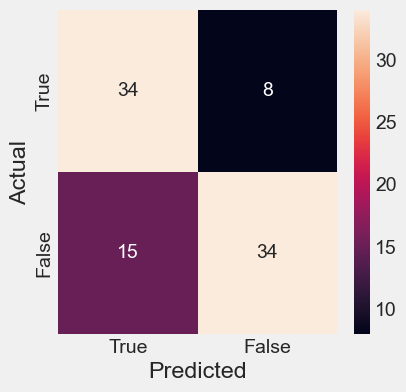

In [16]:
import seaborn as sns
# create confusion matrix
y_pred=rfc.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', conf_mat)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

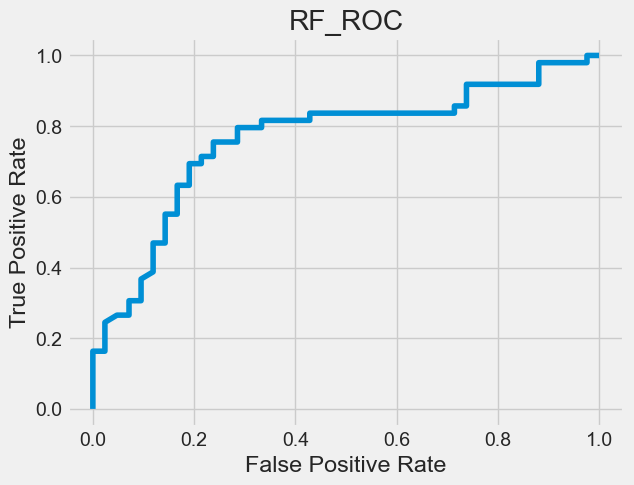

AUC得分： 0.7648202137998055


In [17]:
# 画出ROC曲线并计算AUC得分
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF_ROC')
plt.show()
auc_score = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
print("AUC得分：", auc_score)